#Regresi Linear

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
data = pd.DataFrame({
    'Kamera' : [8, 2, 6, 9, 4, 5, 7, 3],
    'Harga' : [7, 3, 7, 10, 2, 6, 8, 3]
})

In [ ]:
data

,Kamera,Harga
0,8,7
1,2,3
2,6,7
3,9,10
4,4,2
5,5,6
6,7,8
7,3,3


In [ ]:
data_1 = pd.DataFrame([[8,7], [2,3], [6,7], [9,10], [4,2], [5,6], [7,8], [3,3]])
data_1.columns = ['Kamera(x)', 'Harga(y)']
data_1

,Kamera(x),Harga(y)
0,8,7
1,2,3
2,6,7
3,9,10
4,4,2
5,5,6
6,7,8
7,3,3


In [ ]:
# mengubah dimensi data dari 1D ke 2D
X = data_1['Kamera(x)'].values[:, np.newaxis]
y = data_1['Harga(y)'].values

In [ ]:
# memisahkan data untuk training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# opsi 1 simpan ke dalam variabel agar lebih singkat
lr = LinearRegression()
lr.fit(X, y)

# opsi 2
# LinearRegression().fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept :" + str(lr.intercept_)) 
print("Coefficient :" + str(lr.coef_)) 

Intercept :-0.011904761904761862
Coefficient :[1.04761905]


In [ ]:
X_test_1 = [[4],[5]]

In [ ]:
predict_result = lr.predict(X_test_1)
print(predict_result)

[4.17857143 5.22619048]


<function matplotlib.pyplot.show>

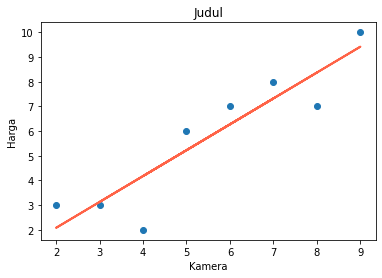

In [ ]:
predict_for_xtrain = lr.predict(X)
temporary_dataframe = pd.DataFrame({
    'x' : data_1['Kamera(x)'],
    'y' : predict_for_xtrain
})

plt.scatter(data_1['Kamera(x)'], data_1['Harga(y)'])

plt.plot(temporary_dataframe['x'], temporary_dataframe['y'], color='tomato', linewidth=2)

plt.xlabel('Kamera')
plt.ylabel('Harga')

plt.title('Judul')

plt.show

# Regresi Logistic

In [ ]:
import_data_iris = load_iris()

In [ ]:
data_iris = pd.DataFrame(data = np.c_[import_data_iris['data'], import_data_iris['target']], columns=import_data_iris['feature_names']+['target'])
data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


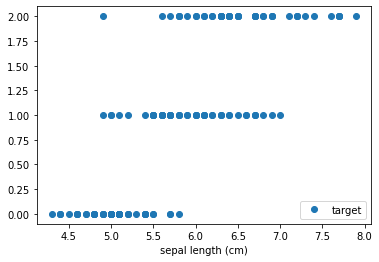

In [ ]:
data_iris.plot(x = 'sepal length (cm)', y = 'target', style = 'o')

In [ ]:
X = data_iris.iloc[:, :-1]
y = data_iris.iloc[:, -1]

In [ ]:
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model_lrg = LogisticRegression()

model_lrg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prd = model_lrg.predict(X_test)
print(prd)

[2. 1. 1. 1. 0. 2. 1. 0. 2. 2. 2. 0. 0. 2. 2. 1. 1. 1. 0. 0. 0. 2. 0. 1.
 0. 0. 1. 1. 0. 0.]


In [ ]:
prd_df = pd.DataFrame(data=prd)
prd_df

,0
0,2.0
1,1.0
2,1.0
3,1.0
4,0.0
5,2.0
6,1.0
7,0.0
8,2.0
9,2.0


In [ ]:
result = pd.concat([prd_df, X_test], axis=1)
result

,0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,2.0,5.1,3.5,1.4,0.2
1,1.0,NaN,NaN,NaN,NaN
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2
5,2.0,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN
8,2.0,4.4,2.9,1.4,0.2
9,2.0,NaN,NaN,NaN,NaN


gabungkan hasil prediksi untuk jdi dataframe pake pandas